In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score,confusion_matrix,recall_score, accuracy_score, classification_report,roc_curve, roc_auc_score
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [2]:
df=pd.read_csv("telco2.csv", sep=",") #load file
pd.set_option('max_columns',43)
df

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineServices,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,1,0,0,0,34,1,0,56.95,1889.50,0,3,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,2,1,0,0,0,2,1,1,53.85,108.15,1,3,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,3,1,0,0,0,45,0,0,42.30,1840.75,0,3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,4,0,0,0,0,2,1,1,70.70,151.65,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,0,1,1,24,1,1,84.80,1990.50,0,7,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,7039,0,0,1,1,72,1,1,103.20,7362.90,0,6,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,7040,0,0,1,1,11,0,1,29.60,346.45,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,7041,1,1,1,0,4,1,1,74.40,306.60,1,2,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [3]:
df.drop(["Unnamed: 0",], axis =1, inplace = True)

In [24]:
# Load the model from the file
import joblib 
knn_from_joblib = joblib.load('knnmodel.pkl')  
knn_from_score_joblib = joblib.load('knnmodelscore.pkl')
bayes_from_joblib = joblib.load('n_bayes.pkl')  
bayes_from_score_joblib = joblib.load('n_bayesscore.pkl')  
forest_from_joblib = joblib.load('forestmodel.pkl') 
forest_from_score_joblib = joblib.load('forestmodelscore.pkl')  
xgb_from_joblib = joblib.load('xgbmodel.pkl') 
xgb_from_score_joblib = joblib.load('xgbmodel_score.pkl')  
decision_from_joblib = joblib.load('decisionmodel.pkl')  
decision_from_score_joblib = joblib.load('decisionmodelscore.pkl')  
svc_from_joblib = joblib.load('svcmodel.pkl') 
svc_from_score_joblib = joblib.load('svcmodelscore.pkl')

### 1-Accuracy comparison of models

In [33]:
#In the model tuning section, I found the best results of the algorithms. Here I evaluated the best results of each algorithm.
acc = [knn_from_score_joblib,bayes_from_score_joblib,forest_from_score_joblib,xgb_from_score_joblib,decision_from_score_joblib,svc_from_score_joblib]
alg = ["KNN Accuracy","Naive Bayes Accuracy","Random Forest Accuracy","XGBoost Accuracy","Decision Tree Accuracy","SVC Accuracy"]
for i,model in enumerate(acc):
    print(alg[i])
    print(model)
    print("-"*28)

KNN Accuracy
0.7980039807011576
----------------------------
Naive Bayes Accuracy
0.6891412349183819
----------------------------
Random Forest Accuracy
0.794889992902768
----------------------------
XGBoost Accuracy
0.7955416666666667
----------------------------
Decision Tree Accuracy
0.785935905672499
----------------------------
SVC Accuracy
0.7920511000709723
----------------------------


In [31]:
acc2 = []
for model in acc:
    acc2.append(round(model,2)*100)
    #round(70.73755, 2)

In [32]:
acc2

[80.0, 69.0, 79.0, 80.0, 79.0, 79.0]

### 2-Accuracy graph

In [34]:
list_of_tuples = list(zip(alg, acc2)) 
model_data = pd.DataFrame(list_of_tuples, columns = ['Model', 'Accuracy']) 

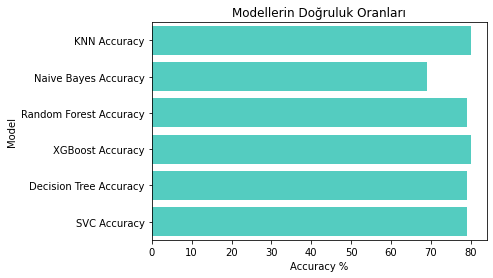

In [36]:
import seaborn as sns
sns.barplot(x= 'Accuracy', y = 'Model', data=model_data , color='turquoise')
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');

## Most successful algorithm: KNN